In [1]:
# # 머신러닝 모델 구축, 평가를 위한 기본 라이브러리 설치
# !pip install scikit-learn

# # 데이터 시각화를 위한 라이브러리 설치
# !pip install matplotlib seaborn

# # 고객 이탈 예측에서 자주 사용하는 고성능 부스팅 알고리즘 설치
# !pip install xgboost

# # 대규모 데이터셋에서 성능이 좋은 부스팅 알고리즘 설치
# !pip install lightgbm

# # 이탈 예측에서 발생할 수 있는 불균형 데이터 문제 해결하는 데 유용한 라이브러리 설치
# !pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('c:/pythondata/cell2celltrain.csv')

In [3]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# 전처리

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 아이디, 나이 관련 변수 삭제 (CustomerID, AgeHH1, AgeHH2)
data = data.drop(columns=['CustomerID', 'AgeHH1', 'AgeHH2'])

# 2. 이진형 변수의 'Yes'와 'No'를 1과 0으로 변환
binary_columns = ['NewCellphoneUser', 'NotNewCellphoneUser', 'HandsetRefurbished',
                  'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
                  'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
                  'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'OwnsMotorcycle',
                  'MadeCallToRetentionTeam']

# 타겟변수 이진형 처리
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

# 'Yes'를 1로, 'No'를 0으로 변환
data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})

# 3. 'Homeownership'의 'Unknown'을 0으로, 'Known'을 1로 변환
data['Homeownership'] = data['Homeownership'].replace({'Unknown': 0, 'Known': 1})

# 4. 연속형, 범주형, 이진형 변수 설정
continuous_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                      'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
                      'CurrentEquipmentDays', 'Handsets', 'HandsetModels', 'DroppedCalls', 'BlockedCalls',
                      'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
                      'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                      'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService']

categorical_columns = ['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'HandsetPrice']

# CallForwardingCalls의 0 비율이 매우 높으므로 이진화 처리
data['CallForwardingCalls_binary'] = (data['CallForwardingCalls'] > 0).astype(int)

# CallForwardingCalls_binary를 binary_columns에 추가하고 원래 CallForwardingCalls 삭제
binary_columns.append('CallForwardingCalls_binary')
data = data.drop(columns=['CallForwardingCalls'])

# 연속형 변수 리스트에서 CallForwardingCalls를 삭제
continuous_columns.remove('CallForwardingCalls')



C:\Users\angel\AppData\Local\Temp\ipykernel_18260\1688374677.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_18260\1688374677.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_18260\1688374677.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

In [4]:
# 5. 이상치 처리를 위한 Custom Transformer
class OutlierReplacer:
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for column in self.columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            X[column] = np.where(X[column] > upper_bound, upper_bound,
                                 np.where(X[column] < lower_bound, lower_bound, X[column]))
        return X

# 전처리 파이프라인 구성
outlier_replacer = OutlierReplacer(continuous_columns)

preprocessor = ColumnTransformer(
    transformers=[
        # 연속형 변수에 대한 전처리 (이상치, 결측치, 스케일링)
        ('num', Pipeline(steps=[
            ('outlier_replacement', outlier_replacer),
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), continuous_columns),

        # 범주형 변수에 대한 전처리
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_columns),

        # 이진형 변수는 결측치 처리만 적용
        ('bin', SimpleImputer(strategy='most_frequent'), binary_columns)
    ],
    remainder='drop'
)

# 타겟 변수 및 피처 분리
X = data.drop(columns=['Churn'])
y = data['Churn']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 전처리 실행
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [5]:
# 6. VIF 계산
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 연속형 변수에 해당하는 열만 추출하여 VIF 계산
X_train_continuous = pd.DataFrame(X_train_preprocessed[:, :len(continuous_columns)], columns=continuous_columns)

# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_result = calculate_vif(X_train_continuous)
print(vif_result)


                  feature        VIF
0          MonthlyRevenue   7.106723
1          MonthlyMinutes   5.456553
2    TotalRecurringCharge   3.806379
3   DirectorAssistedCalls   1.356443
4          OverageMinutes   3.539344
5            RoamingCalls   1.070527
6       PercChangeMinutes   1.484143
7      PercChangeRevenues   1.503314
8    CurrentEquipmentDays   2.885175
9                Handsets   5.693610
10          HandsetModels   5.795749
11           DroppedCalls   8.331930
12           BlockedCalls   5.015143
13        UnansweredCalls   3.337493
14      CustomerCareCalls   1.486759
15          ThreewayCalls   1.254809
16          ReceivedCalls   5.099352
17          OutboundCalls   4.254641
18           InboundCalls   2.719632
19         PeakCallsInOut   5.180485
20      OffPeakCallsInOut   5.887395
21    DroppedBlockedCalls  14.452176
22       CallWaitingCalls   2.456295
23        MonthsInService   2.844011


In [6]:
# VIF 10 이상인(다중공선성 있는) 변수 제거
high_vif_columns = vif_result[vif_result['VIF'] > 10]['feature'].tolist()
X_train_continuous_reduced = X_train_continuous.drop(columns=high_vif_columns)

# VIF 재계산 후 확인
final_vif = calculate_vif(X_train_continuous_reduced)
print(final_vif)

# 이때 continuous_columns_reduced를 업데이트
continuous_columns_reduced = X_train_continuous_reduced.columns.tolist()

# 7. SMOTE 적용 후 모델 학습 가능
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

                  feature       VIF
0          MonthlyRevenue  7.106449
1          MonthlyMinutes  5.446364
2    TotalRecurringCharge  3.805990
3   DirectorAssistedCalls  1.356432
4          OverageMinutes  3.539314
5            RoamingCalls  1.070393
6       PercChangeMinutes  1.484127
7      PercChangeRevenues  1.503183
8    CurrentEquipmentDays  2.885171
9                Handsets  5.692881
10          HandsetModels  5.793992
11           DroppedCalls  2.300271
12           BlockedCalls  1.390489
13        UnansweredCalls  3.272382
14      CustomerCareCalls  1.486597
15          ThreewayCalls  1.217644
16          ReceivedCalls  5.094110
17          OutboundCalls  4.253936
18           InboundCalls  2.716693
19         PeakCallsInOut  5.160546
20      OffPeakCallsInOut  5.830266
21       CallWaitingCalls  2.454293
22        MonthsInService  2.843298


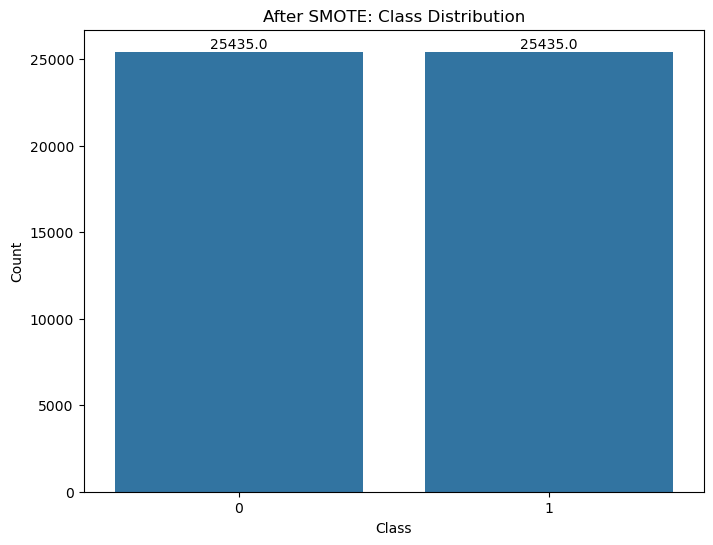

In [7]:
# SMOTE 적용 후 클래스 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title("After SMOTE: Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# 각 클래스 위에 숫자 표시
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

plt.show()

# 변수 선정

## SHAP을 이용한 변수 선정
### SHAP 라이브러리
- **SHAP(SHapley Additive exPlanations)**는 게임이론의 샤플리값에 기반을 둔 해석 방법으로, 모델의 각 특성이 최종 예측에 어떻게 기여하는지 설명
- 각 특성의 기여도를 정량화하여, 모델의 예측을 투명하고 이해하기 쉽게 만듦.
- SHAP값은 각 특성이 특정 예측에 미치는 영향의 크기와 방향을 나타내며, 이 값들의 합은 모델의 예측과 기준 출력 값의 차이를 설명한다.
  
**SHAP사용의 주요 장점**  
- 공정성 : 각 입력 변수가 예측에 공평하게 기여하는지 평가할 수 있다.
- 합리성 : 모델 예측이 어떻게 결정되었는지 이해할 수 있다.
- 일관성 : 비슷한 입력 값들이 비슷한 기여를 하도록 보장한다.

**기본 개념**
- 모든 특성의 조합을 고려해 각 특성의 기여를 평가.
- 데이터 포인트마다 SHAP값을 계산하여 개별 예측에 대한 통찰을 제공.



### 비즈니스 관점에서의 변수 선정 방식: SHAP vs. Tree Bagging(이전 방식)
- **SHAP**
  - SHAP은 모델의 예측을 설명할 때 *각 특성이 어떻게 기여하는지 명확하게 보여주므로*, 비즈니스 이해관계자에게 특성의 영향력을 보다 직관적으로 설명할 수 있다.
  - 이는 특히 고객 이탈과 같은 중요한 비즈니스 결정에 있어 중요한 변수를 식별하고, 그 기여도를 명확히 할 때 유용.

- **Tree Bagging**
  - Tree Bagging은 변수 중요도를 제공하지만, SHAP처럼 세밀한 해석은 어려움.
  - 그러나 모델의 안정성과 강력한 예측 능력을 제공하므로 예측 성능을 최우선으로 고려할 때 유리할 수 있음.

- 결론적으로 비즈니스 관점에서 결정적인 요인들을 명확히 이해하고 설명할 필요가 있다면, **SHAP을 사용한 변수 선택 방식**이 더 설득력 있을 수 있다. SHAP는 각 변수가 예측 결과에 미치는 정확한 영향을 분석하고 설명하는 데 강점을 가지고 있기 때문.

In [8]:
# SHAP 설치
!pip install shap
import shap

## (--)RandomForestClassifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# import shap
# import numpy as np
# import pandas as pd

# # RandomForestClassifier 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [50, 100],  # 트리 개수
#     'max_depth': [None, 10, 20],  # 트리 최대 깊이
#     'min_samples_split': [2, 5],  # 노드를 분할하기 위한 최소 샘플 수
#     'min_samples_leaf': [1, 2]  # 리프 노드의 최소 샘플 수
# }

# # 교차 검증 전략 (Stratified K-Fold)
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # RandomForestClassifier와 GridSearchCV 설정
# rf_model = RandomForestClassifier(random_state=42)

# # GridSearchCV 설정 (교차 검증 사용)
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
#                            cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=2)

# # 하이퍼파라미터 튜닝 및 교차 검증 수행
# grid_search.fit(X_train_resampled, y_train_resampled)

# # 최적 하이퍼파라미터 및 성능 확인
# print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
# print(f"최적 교차 검증 점수: {grid_search.best_score_}")

# # 최적 하이퍼파라미터로 학습된 모델
# best_rf_model = grid_search.best_estimator_

# # 특성 이름 구성 (연속형 + 인코딩된 범주형 + 이진형)
# all_features = continuous_columns + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)) + binary_columns

# # SHAP 계산 (데이터의 일부 샘플 1000개만 선택)
# sample_size = 1000
# X_train_sample = X_train_resampled[:sample_size]

# # SHAP 계산
# explainer = shap.TreeExplainer(best_rf_model)
# shap_values = explainer.shap_values(X_train_sample, check_additivity=False)  # 가법성 비활성화


# # 이진 분류 모델이므로 클래스 1의 SHAP 값을 사용
# if isinstance(shap_values, list):
#     shap_values = shap_values[1]

# # SHAP 요약 플롯 (일부 샘플을 사용하여 계산)
# shap.summary_plot(shap_values, X_train_sample, feature_names=all_features, plot_type="bar")

# # SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
# shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# # SHAP 값이 높은 상위 30개의 변수 인덱스 추출
# top_30_indices = np.argsort(shap_values_mean)[-30:]

# # 상위 30개 변수 이름과 중요도 추출
# top_30_df = pd.DataFrame({
#     'Feature': np.array(all_features)[top_30_indices],
#     'Importance': shap_values_mean[top_30_indices]
# }).sort_values(by='Importance', ascending=False)

# # 상위 30개의 변수 출력
# print(top_30_df)


## GradientBoostingClassifier

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# import shap
# import numpy as np
# import pandas as pd

# # GradientBoosting 모델 학습
# gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# gb_model.fit(X_train_resampled, y_train_resampled)

# # 특성 이름 구성 (연속형 + 인코딩된 범주형 + 이진형)
# all_features = continuous_columns + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)) + binary_columns

# # SHAP 계산
# explainer = shap.TreeExplainer(gb_model)
# shap_values = explainer.shap_values(X_train_resampled)

# # 이진 분류 모델이므로 클래스 1의 SHAP 값을 사용
# if isinstance(shap_values, list):
#     shap_values = shap_values[1]

# # SHAP 요약 플롯
# shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# # SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
# shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# # SHAP 값이 높은 상위 30개의 변수 인덱스 추출
# top_30_indices = np.argsort(shap_values_mean)[-30:]

# # 상위 30개 변수 이름과 중요도 추출
# top_30_df = pd.DataFrame({
#     'Feature': np.array(all_features)[top_30_indices],
#     'Importance': shap_values_mean[top_30_indices]
# }).sort_values(by='Importance', ascending=False)

# # 상위 30개의 변수 출력
# print(top_30_df)


## XGBoostClassifier

C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:13:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


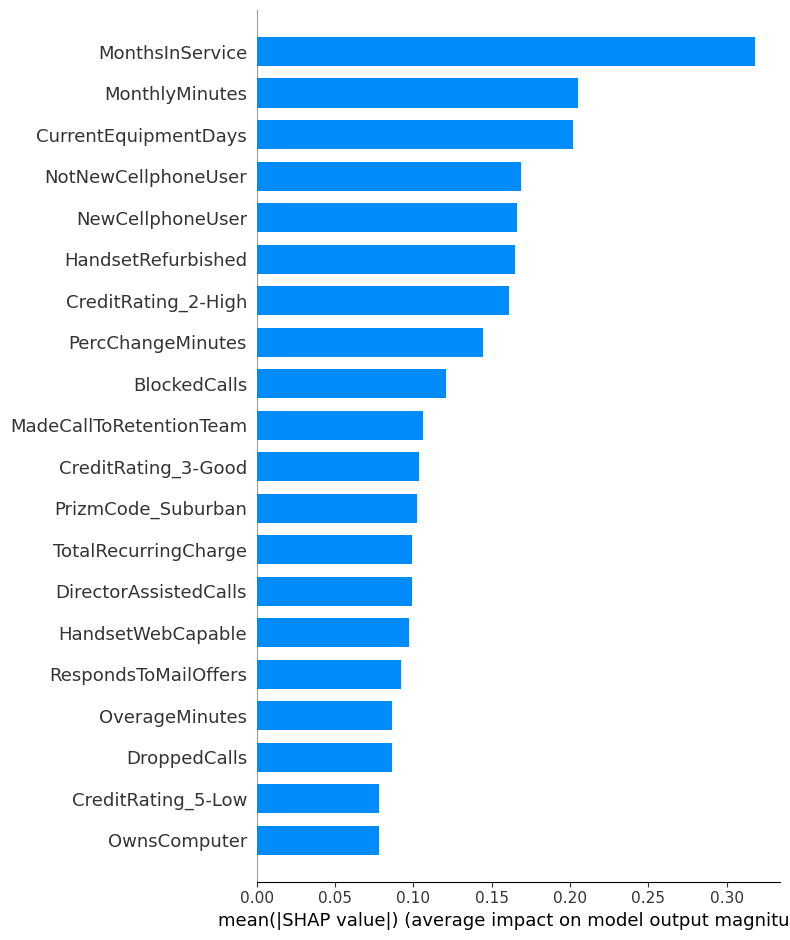

                    Feature  Importance
29          MonthsInService    0.318161
28           MonthlyMinutes    0.205102
27     CurrentEquipmentDays    0.201752
26      NotNewCellphoneUser    0.168628
25         NewCellphoneUser    0.166140
24       HandsetRefurbished    0.164893
23      CreditRating_2-High    0.161204
22        PercChangeMinutes    0.144484
21             BlockedCalls    0.120990
20  MadeCallToRetentionTeam    0.106021
19      CreditRating_3-Good    0.103478
18       PrizmCode_Suburban    0.102122
17     TotalRecurringCharge    0.099226
16    DirectorAssistedCalls    0.098779
15        HandsetWebCapable    0.097346
14     RespondsToMailOffers    0.092091
13           OverageMinutes    0.086253
12             DroppedCalls    0.086062
11       CreditRating_5-Low    0.077945
10             OwnsComputer    0.077796
9     MaritalStatus_Unknown    0.076624
8                  Handsets    0.075988
7                TruckOwner    0.074225
6           PrizmCode_Other    0.072139


In [11]:
import xgboost as xgb
import shap
import numpy as np
import pandas as pd

# XGBoost 모델 학습
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 특성 이름 구성 (연속형 + 인코딩된 범주형 + 이진형)
all_features = continuous_columns + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)) + binary_columns

# SHAP 계산
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_resampled)

# 이진 분류 모델이므로 클래스 1의 SHAP 값을 사용
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# SHAP 값이 높은 상위 30개의 변수 인덱스 추출
top_30_indices = np.argsort(shap_values_mean)[-30:]

# 상위 30개 변수 이름과 중요도 추출
top_30_df = pd.DataFrame({
    'Feature': np.array(all_features)[top_30_indices],
    'Importance': shap_values_mean[top_30_indices]
}).sort_values(by='Importance', ascending=False)

# 상위 30개의 변수 출력
print(top_30_df)


## LightGBMClassifier

[LightGBM] [Info] Number of positive: 25435, number of negative: 25435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29561
[LightGBM] [Info] Number of data points in the train set: 50870, number of used features: 431
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


shap_values의 길이: 796
all_features의 길이: 796


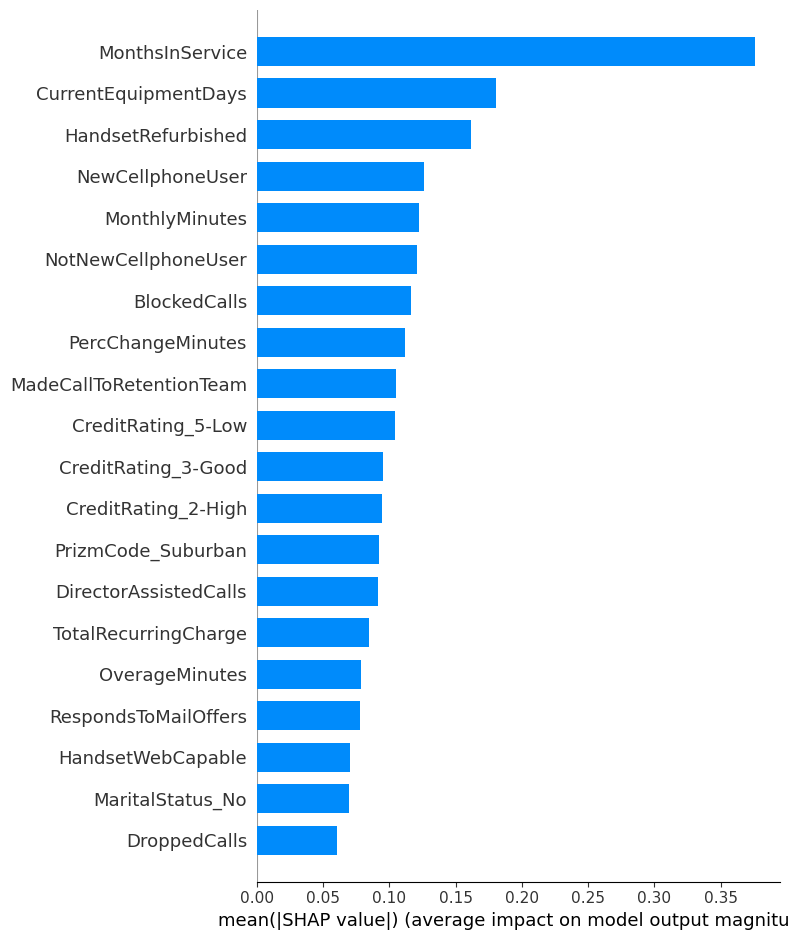

                    Feature  Importance
29          MonthsInService    0.375929
28     CurrentEquipmentDays    0.180609
27       HandsetRefurbished    0.161518
26         NewCellphoneUser    0.125927
25           MonthlyMinutes    0.122387
24      NotNewCellphoneUser    0.120694
23             BlockedCalls    0.116318
22        PercChangeMinutes    0.111639
21  MadeCallToRetentionTeam    0.105128
20       CreditRating_5-Low    0.104127
19      CreditRating_3-Good    0.094981
18      CreditRating_2-High    0.094199
17       PrizmCode_Suburban    0.092475
16    DirectorAssistedCalls    0.091396
15     TotalRecurringCharge    0.084422
14           OverageMinutes    0.078221
13     RespondsToMailOffers    0.077748
12        HandsetWebCapable    0.070077
11         MaritalStatus_No    0.069877
10             DroppedCalls    0.060750
9                TruckOwner    0.059394
8     MaritalStatus_Unknown    0.058312
7              OwnsComputer    0.055195
6         CustomerCareCalls    0.041951


In [12]:
import shap
import lightgbm as lgb
import numpy as np
import pandas as pd

# LightGBM 모델 학습
lightgbm_model = lgb.LGBMClassifier(random_state=42)
lightgbm_model.fit(X_train_resampled, y_train_resampled)

# SHAP 계산
explainer = shap.TreeExplainer(lightgbm_model)
shap_values = explainer.shap_values(X_train_resampled)

# 이진 분류 모델의 경우, shap_values는 두 개의 배열로 나오므로 클래스 1에 대한 SHAP 값을 사용
if isinstance(shap_values, list):  # shap_values가 리스트인 경우 (이진 분류)
    shap_values = shap_values[1]

# SHAP 값의 길이와 특성 이름 리스트의 길이 확인
print(f"shap_values의 길이: {shap_values.shape[1]}")  # 특성 수 확인
print(f"all_features의 길이: {len(all_features)}")  # 특성 이름 리스트의 길이 확인

# 특성 이름과 SHAP 값의 길이가 일치하는지 확인
if shap_values.shape[1] != len(all_features):
    raise ValueError("SHAP 값의 길이와 특성 이름 리스트의 길이가 일치하지 않습니다!")

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# SHAP 값이 높은 상위 30개의 변수 인덱스 추출
top_30_indices = np.argsort(shap_values_mean)[-30:]

# 상위 30개 변수 이름과 중요도 추출
top_30_df = pd.DataFrame({
    'Feature': np.array(all_features)[top_30_indices],
    'Importance': shap_values_mean[top_30_indices]
}).sort_values(by='Importance', ascending=False)

# 상위 30개의 변수 출력
print(top_30_df)


## CatBoostClassifier

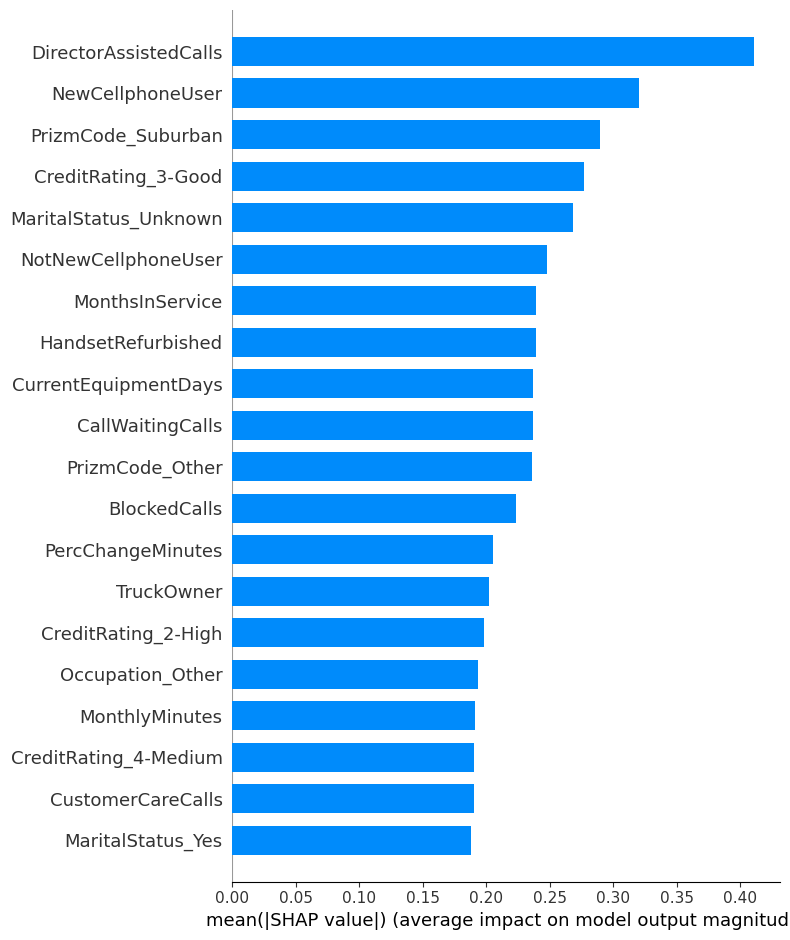

                   Feature  Importance
29   DirectorAssistedCalls    0.410605
28        NewCellphoneUser    0.320287
27      PrizmCode_Suburban    0.289592
26     CreditRating_3-Good    0.277164
25   MaritalStatus_Unknown    0.268535
24     NotNewCellphoneUser    0.247998
23         MonthsInService    0.239308
22      HandsetRefurbished    0.238797
21    CurrentEquipmentDays    0.236991
20        CallWaitingCalls    0.236794
19         PrizmCode_Other    0.235816
18            BlockedCalls    0.223241
17       PercChangeMinutes    0.204831
16              TruckOwner    0.201689
15     CreditRating_2-High    0.198125
14        Occupation_Other    0.193184
13          MonthlyMinutes    0.190835
12   CreditRating_4-Medium    0.190529
11       CustomerCareCalls    0.190487
10       MaritalStatus_Yes    0.187801
9             DroppedCalls    0.168316
8   CreditRating_1-Highest    0.163881
7         MaritalStatus_No    0.163658
6      DroppedBlockedCalls    0.156495
5        HandsetWebCapabl

In [13]:
import shap
import catboost as cb
import numpy as np
import pandas as pd

# CatBoost 모델 학습 1
catboost_model = cb.CatBoostClassifier(iterations=100, random_state=42, verbose=0)

# X_train_resampled을 dataframe으로 변환하지 않는다면
# 범주형 피처의 인덱스 추출 (X_train_resampled이 numpy.ndarray일 경우)
cat_features_indices = [all_features.index(col) for col in categorical_columns if col in all_features]

# CatBoost 모델 학습 2
catboost_model.fit(X_train_resampled, y_train_resampled, cat_features=cat_features_indices)

# SHAP 계산
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_train_resampled)

# 이진 분류 모델이므로 클래스 1의 SHAP 값을 사용
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# SHAP 값이 높은 상위 30개의 변수 인덱스 추출
top_30_indices = np.argsort(shap_values_mean)[-30:]

# 상위 30개 변수 이름과 중요도 추출
top_30_df = pd.DataFrame({
    'Feature': np.array(all_features)[top_30_indices],
    'Importance': shap_values_mean[top_30_indices]
}).sort_values(by='Importance', ascending=False)

# 상위 30개의 변수 출력
print(top_30_df)


## HistGradientBoostingClassifier

C:\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


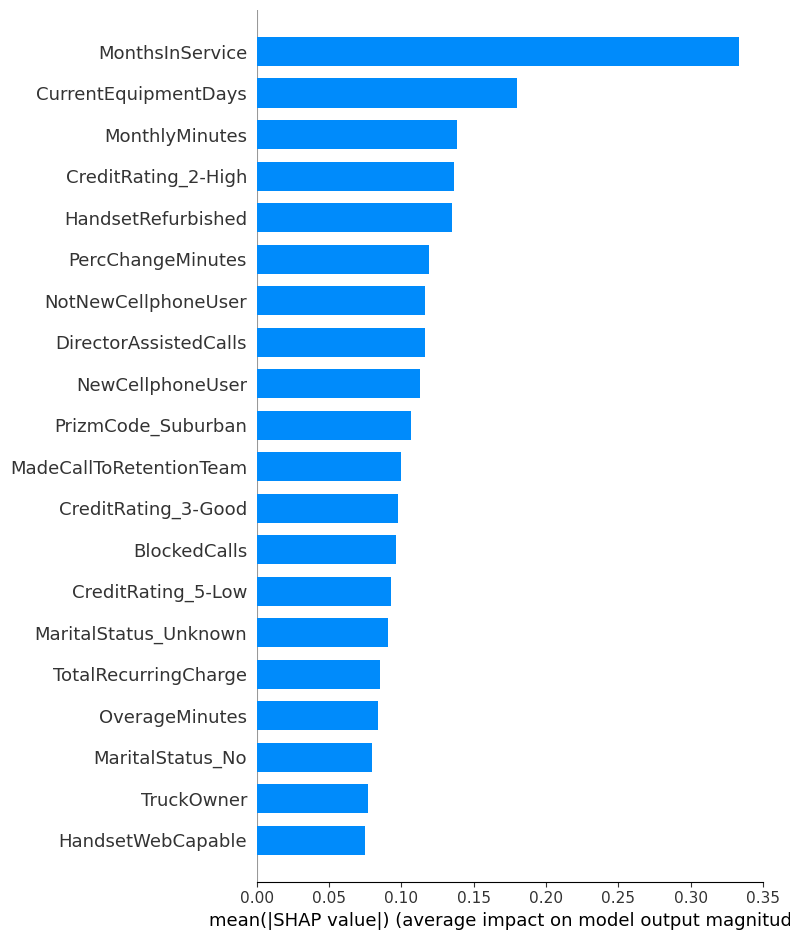

                    Feature  Importance
29          MonthsInService    0.333376
28     CurrentEquipmentDays    0.179728
27           MonthlyMinutes    0.138580
26      CreditRating_2-High    0.136164
25       HandsetRefurbished    0.134932
24        PercChangeMinutes    0.118751
23      NotNewCellphoneUser    0.116194
22    DirectorAssistedCalls    0.116160
21         NewCellphoneUser    0.112886
20       PrizmCode_Suburban    0.106793
19  MadeCallToRetentionTeam    0.099473
18      CreditRating_3-Good    0.097744
17             BlockedCalls    0.095980
16       CreditRating_5-Low    0.092893
15    MaritalStatus_Unknown    0.090852
14     TotalRecurringCharge    0.085506
13           OverageMinutes    0.083576
12         MaritalStatus_No    0.079962
11               TruckOwner    0.077112
10        HandsetWebCapable    0.074705
9              OwnsComputer    0.062341
8      RespondsToMailOffers    0.058244
7              DroppedCalls    0.056982
6         CustomerCareCalls    0.053143


In [14]:
from sklearn.experimental import enable_hist_gradient_boosting  # HistGradientBoostingClassifier 사용 가능하게 함
from sklearn.ensemble import HistGradientBoostingClassifier
import shap
import numpy as np
import pandas as pd

# 이미 전처리가 완료된 데이터 사용
# X_train_resampled, y_train_resampled 는 SMOTE가 적용된 데이터
# X_test_preprocessed 는 테스트 데이터

# 1. HistGradientBoostingClassifier로 모델 학습
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train_resampled, y_train_resampled)

# 2. SHAP 값을 계산 (TreeExplainer 사용)
explainer = shap.TreeExplainer(hgb_model)
shap_values = explainer.shap_values(X_train_resampled, check_additivity=False)  # 가법성 비활성화

# 3. SHAP 요약 플롯 (상위 변수 시각화)
shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# 4. SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# 5. SHAP 값이 높은 상위 30개의 변수 인덱스 추출
top_30_indices = np.argsort(shap_values_mean)[-30:]

# 6. 상위 30개 변수 이름과 중요도 추출
top_30_df = pd.DataFrame({
    'Feature': np.array(all_features)[top_30_indices],
    'Importance': shap_values_mean[top_30_indices]
}).sort_values(by='Importance', ascending=False)

# 7. 상위 30개의 변수 출력
print(top_30_df)


## (--)RandomForestClassifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# import shap
# import numpy as np
# import pandas as pd

# # RandomForest 모델 학습
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train_resampled, y_train_resampled)

# # SHAP 계산
# explainer = shap.TreeExplainer(rf_model)
# shap_values = explainer.shap_values(X_train_resampled)

# # RandomForest는 이진 분류이므로 클래스 1의 SHAP 값을 사용
# if isinstance(shap_values, list):
#     shap_values = shap_values[1]

# # SHAP 요약 플롯
# shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# # SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
# shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# # SHAP 값이 높은 상위 30개의 변수 인덱스 추출
# top_30_indices = np.argsort(shap_values_mean)[-30:]

# # 상위 30개 변수 이름과 중요도 추출
# top_30_df = pd.DataFrame({
#     'Feature': np.array(all_features)[top_30_indices],
#     'Importance': shap_values_mean[top_30_indices]
# }).sort_values(by='Importance', ascending=False)

# # 상위 30개의 변수 출력
# print(top_30_df)


## (--)BalancedRandomForestClassifier
- 불균형 데이터를 처리하는 랜덤 포레스트의 변형
- 각 부트스트랩 샘플링 단계에서 소수 클래스 데이터를 더 많이 샘플링하여 불균형 문제를 완화

In [ ]:
# from imblearn.ensemble import BalancedRandomForestClassifier
# import shap
# import numpy as np
# import pandas as pd

# # BalancedRandomForest 모델 학습 (트리 개수와 깊이를 원래 설정으로 복구)
# brf_model = BalancedRandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

# # 전체 데이터를 사용하여 모델 학습
# brf_model.fit(X_train_resampled, y_train_resampled)

# # SHAP 계산 (전체 데이터를 사용하여 SHAP 계산)
# explainer = shap.TreeExplainer(brf_model)
# shap_values = explainer.shap_values(X_train_resampled)

# # 이진 분류이므로 클래스 1의 SHAP 값을 사용
# if isinstance(shap_values, list):
#     shap_values = shap_values[1]

# # 전체 특성 이름 구성 (연속형 + 인코딩된 범주형 + 이진형)
# all_features = continuous_columns + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)) + binary_columns

# # SHAP 요약 플롯 (전체 데이터를 사용하여 SHAP 계산)
# shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# # SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
# shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# # SHAP 값이 높은 상위 30개의 변수 인덱스 추출
# top_30_indices = np.argsort(shap_values_mean)[-30:]

# # 상위 30개 변수 이름과 중요도 추출
# top_30_df = pd.DataFrame({
#     'Feature': np.array(all_features)[top_30_indices],
#     'Importance': shap_values_mean[top_30_indices]
# }).sort_values(by='Importance', ascending=False)

# # 상위 30개의 변수 출력
# print(top_30_df)


## (--)AdaBoostClassifier
- 분류 성능이 상대적으로 약한 분류기를 여러 개 결합하여 강력한 분류기를 만드는 방법.
- 불균형 데이터에서 성능이 괜찮은 편.
- decisionTreeExplainer를 안 쓰고 KernelExplainer를 사용해서 전체 모델 흐름의 일관성을 해치기 때문에 제외

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# import shap
# import numpy as np
# import pandas as pd

# # AdaBoost 모델 학습
# ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
# ada_model.fit(X_train_resampled, y_train_resampled)

# # SHAP 계산
# explainer = shap.TreeExplainer(ada_model)
# shap_values = explainer.shap_values(X_train_resampled)

# # AdaBoost는 이진 분류이므로 클래스 1의 SHAP 값을 사용
# if isinstance(shap_values, list):
#     shap_values = shap_values[1]

# # SHAP 요약 플롯
# shap.summary_plot(shap_values, X_train_resampled, feature_names=all_features, plot_type="bar")

# # SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
# shap_values_mean = np.mean(np.abs(shap_values), axis=0)

# # SHAP 값이 높은 상위 30개의 변수 인덱스 추출
# top_30_indices = np.argsort(shap_values_mean)[-30:]

# # 상위 30개 변수 이름과 중요도 추출
# top_30_df = pd.DataFrame({
#     'Feature': np.array(all_features)[top_30_indices],
#     'Importance': shap_values_mean[top_30_indices]
# }).sort_values(by='Importance', ascending=False)

# # 상위 30개의 변수 출력
# print(top_30_df)


## 앙상블모델 - votingclassifier(hard voting)
- 4가지 모델(XGBoost, LightGBM, CatBoost)을 결합한 앙상블 모델
- hard voting으로 변수 선정> soft voting으로 모델 성능 평가
- HistGradientBoosting은 shap과의 호환성이 떨어지므로 모델 조합 제외
    - 가법성 비활성화 옵션을 통해 강제로 적용할 수 있으나, 앙상블 모델로 조합 시 일관되지 않은 모델 해석 가능성(나머지 모델에서는 가법성 활성화)

C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 10297, number of negative: 25435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3748
[LightGBM] [Info] Number of data points in the train set: 35732, number of used features: 353
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288173 -> initscore=-0.904274
[LightGBM] [Info] Start training from score -0.904274


C:\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


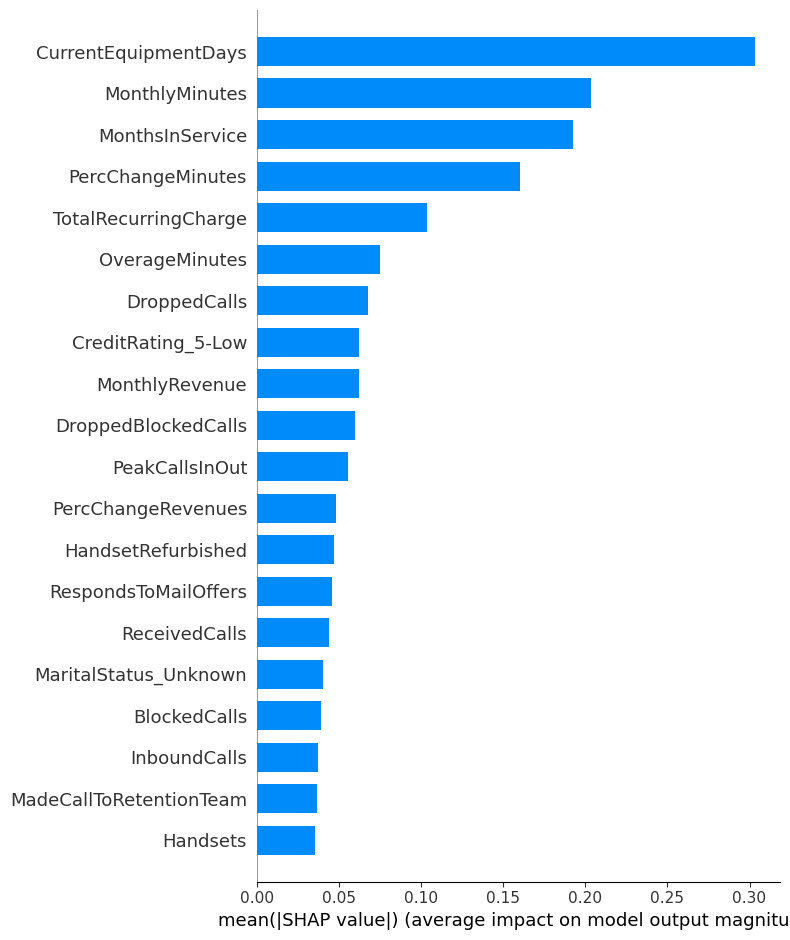

                    Feature  Importance
29     CurrentEquipmentDays    0.303399
28           MonthlyMinutes    0.203269
27          MonthsInService    0.192215
26        PercChangeMinutes    0.160522
25     TotalRecurringCharge    0.103557
24           OverageMinutes    0.074750
23             DroppedCalls    0.067599
22       CreditRating_5-Low    0.062406
21           MonthlyRevenue    0.062062
20      DroppedBlockedCalls    0.059762
19           PeakCallsInOut    0.055788
18       PercChangeRevenues    0.048156
17       HandsetRefurbished    0.046890
16     RespondsToMailOffers    0.045473
15            ReceivedCalls    0.044020
14    MaritalStatus_Unknown    0.040451
13             BlockedCalls    0.039043
12             InboundCalls    0.037232
11  MadeCallToRetentionTeam    0.036621
10                 Handsets    0.035607
9         OffPeakCallsInOut    0.034830
8         CustomerCareCalls    0.033822
7         HandsetWebCapable    0.030670
6           UnansweredCalls    0.030416


In [17]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import shap
import numpy as np
import pandas as pd

# 데이터 전처리 파이프라인 적용
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 개별 모델 정의 및 학습
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
catboost = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)

# 각각의 모델 학습
xgb.fit(X_train_preprocessed, y_train)
lgbm.fit(X_train_preprocessed, y_train)
catboost.fit(X_train_preprocessed, y_train)

# SHAP 계산 (일부 샘플 1000개 사용)
sample_size = 1000
X_train_sample = X_train_preprocessed[:sample_size]

# SHAP 값을 계산 (VotingClassifier는 개별 모델의 SHAP을 계산 후 평균)
explainer_xgb = shap.TreeExplainer(xgb)
explainer_lgbm = shap.TreeExplainer(lgbm)
explainer_catboost = shap.TreeExplainer(catboost)

shap_values_xgb = explainer_xgb.shap_values(X_train_sample)
shap_values_lgbm = explainer_lgbm.shap_values(X_train_sample)
shap_values_catboost = explainer_catboost.shap_values(X_train_sample)

# SHAP 값 평균을 계산 (클래스 1의 SHAP 값 사용, 앙상블 평균)
if isinstance(shap_values_xgb, list):
    shap_values_xgb = shap_values_xgb[1]
if isinstance(shap_values_lgbm, list):
    shap_values_lgbm = shap_values_lgbm[1]
if isinstance(shap_values_catboost, list):
    shap_values_catboost = shap_values_catboost[1]

shap_values_ensemble = (np.abs(shap_values_xgb) + np.abs(shap_values_lgbm) + np.abs(shap_values_catboost)) / 3

# SHAP 요약 플롯
shap.summary_plot(shap_values_ensemble, X_train_sample, feature_names=all_features, plot_type="bar")

# SHAP 값의 절대값 평균을 계산하여 변수 중요도 추출
shap_values_mean = np.mean(shap_values_ensemble, axis=0)

# SHAP 값이 높은 상위 30개의 변수 인덱스 추출
top_30_indices = np.argsort(shap_values_mean)[-30:]

# 상위 30개 변수 이름과 중요도 추출
top_30_df = pd.DataFrame({
    'Feature': np.array(all_features)[top_30_indices],
    'Importance': shap_values_mean[top_30_indices]
}).sort_values(by='Importance', ascending=False)

# 상위 30개의 변수 출력
print(top_30_df)


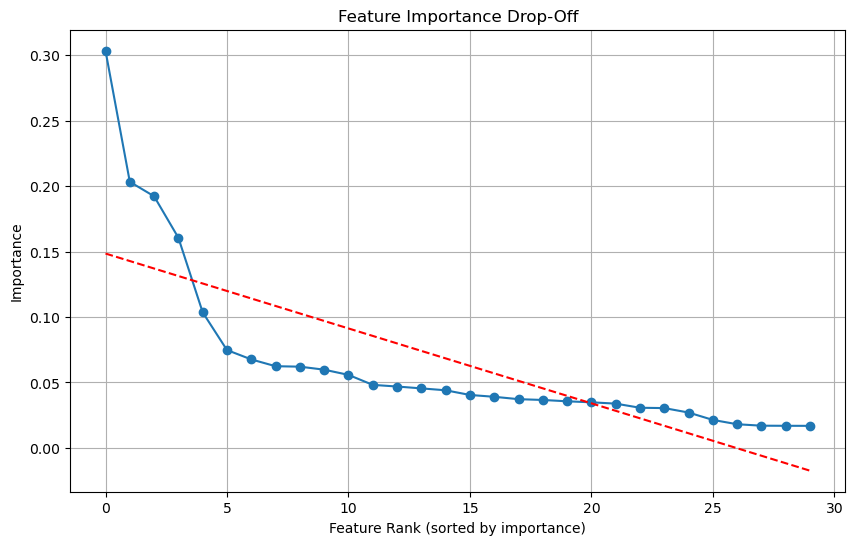

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 중요도 값과 그에 해당하는 변수명 (이미 추출된 데이터를 사용한다고 가정)
importance_values = top_30_df['Importance'].values  # 특성 중요도 값들
features = top_30_df['Feature'].values  # 특성 이름들

# 중요도 값 순서대로 변화 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(len(importance_values)), importance_values, marker='o')
plt.title('Feature Importance Drop-Off')
plt.xlabel('Feature Rank (sorted by importance)')
plt.ylabel('Importance')
plt.grid(True)

# 급격한 변화를 찾기 위한 선형 경향선 추가
z = np.polyfit(range(len(importance_values)), importance_values, 1)
p = np.poly1d(z)
plt.plot(range(len(importance_values)), p(range(len(importance_values))), linestyle='--', color='r')

# 그래프 보여주기
plt.show()


## 결과 해석: SHAP 값을 기반으로 추출한 특성 중요도 순위
### 주요 변수 해석
- CurrentEquipmentDays (0.303399):

이 변수가 가장 중요한 변수로, 고객이 현재 장비를 사용한 일수에 따라 이탈 여부에 큰 영향을 미친다고 볼 수 있습니다. 고객이 장비를 오래 사용할수록 이탈 가능성이 낮거나 높아지는 경향이 있을 수 있습니다.
- MonthlyMinutes (0.203269), MonthsInService (0.192215):

두 번째, 세 번째로 중요한 변수들로, 고객의 월간 통화 시간과 서비스 이용 개월 수가 이탈 여부에 중요한 영향을 미칩니다. 통화 시간이 많거나 서비스 사용 기간이 길면 이탈 가능성에 어떤 패턴이 있을 수 있습니다.

- 모델 성능과 해석 가능성을 균형적으로 고려해 중요도 0.02이상의 변수를 중심으로 모델 구성


### 특성중요도 분포 관점
- 중요도가 0.02 이상인 변수들은 고객 이탈에 중요한 영향을 미치는 핵심 변수로 볼 수 있으며, 0.02 이하의 변수는 모델 성능에 크게 기여하지 않을 수 있습니다. 따라서 0.02 이하의 변수는 필요에 따라 삭제를 고려할 수 있습니다.
- 특성 중요도가 급격하게 하락하는 구간은 0.02 부근입니다. 0.02 이상의 변수를 중심으로 최적의 모델을 구성하는 것이 적절할 수 있습니다.

### 최종 26개 변수 list
- 0.02이하는 삭제  
                    Feature  Importance  
29     CurrentEquipmentDays    0.303399  
28           MonthlyMinutes    0.203269  
27          MonthsInService    0.192215  
26        PercChangeMinutes    0.160522   
25     TotalRecurringCharge    0.103557  
24           OverageMinutes    0.074750  
23             DroppedCalls    0.067599  
22       CreditRating_5-Low    0.062406  
21           MonthlyRevenue    0.062062  
20      DroppedBlockedCalls    0.059762  
19           PeakCallsInOut    0.055788  
18       PercChangeRevenues    0.048156  
17       HandsetRefurbished    0.046890  
16     RespondsToMailOffers    0.045473  
15            ReceivedCalls    0.044020  
14    MaritalStatus_Unknown    0.040451  
13             BlockedCalls    0.039043  
12             InboundCalls    0.037232  
11  MadeCallToRetentionTeam    0.036621  
10                 Handsets    0.035607   
9         OffPeakCallsInOut    0.034830  
8         CustomerCareCalls    0.033822  
7         HandsetWebCapable    0.030670  
6           UnansweredCalls    0.030416  
5             OutboundCalls    0.027018   
4     CreditRating_4-Medium    0.021380   
  

# 모델 학습 및 성능 평가

## 전처리 잘 되었는지 확인(오류 방지)

In [ ]:
# #1. 결측치 처리 확인
# # 훈련 데이터의 결측값 확인
# print("X_train_resampled 결측값 확인:")
# print(pd.DataFrame(X_train_resampled).isnull().sum())

# # 테스트 데이터의 결측값 확인
# print("X_test_preprocessed 결측값 확인:")
# print(pd.DataFrame(X_test_preprocessed).isnull().sum())

In [ ]:
# #2. 범주형 변수 인코딩 확인
# # 인코딩된 범주형 변수 확인 (훈련 데이터)
# print("X_train_resampled의 첫 5개 행:")
# print(pd.DataFrame(X_train_resampled).head())

# # 인코딩된 범주형 변수 확인 (테스트 데이터)
# print("X_test_preprocessed의 첫 5개 행:")
# print(pd.DataFrame(X_test_preprocessed).head())


In [ ]:
# #3. 스케일링 확인
# # 훈련 데이터 연속형 변수의 스케일링 확인
# print("X_train_resampled의 연속형 변수 평균 및 분산:")
# print(pd.DataFrame(X_train_resampled).mean())  # 평균 확인
# print(pd.DataFrame(X_train_resampled).std())   # 표준편차 확인

# # 테스트 데이터 연속형 변수의 스케일링 확인
# print("X_test_preprocessed의 연속형 변수 평균 및 분산:")
# print(pd.DataFrame(X_test_preprocessed).mean())  # 평균 확인
# print(pd.DataFrame(X_test_preprocessed).std())   # 표준편차 확인


In [ ]:
# #4. 데이터 타입 확인
# # 훈련 데이터 타입 확인
# print("X_train_resampled 데이터 타입:")
# print(pd.DataFrame(X_train_resampled).dtypes)

# # 테스트 데이터 타입 확인
# print("X_test_preprocessed 데이터 타입:")
# print(pd.DataFrame(X_test_preprocessed).dtypes)


## 데이터 전처리

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 선택된 26개의 변수를 기준으로 훈련 데이터와 테스트 데이터 준비
selected_features = [
    'CurrentEquipmentDays', 
    'MonthlyMinutes', 
    'MonthsInService', 
    'PercChangeMinutes', 
    'TotalRecurringCharge', 
    'OverageMinutes', 
    'DroppedCalls', 
    'CreditRating_5-Low', 
    'MonthlyRevenue', 
    'DroppedBlockedCalls', 
    'PeakCallsInOut', 
    'PercChangeRevenues', 
    'HandsetRefurbished', 
    'RespondsToMailOffers', 
    'ReceivedCalls', 
    'MaritalStatus_Unknown', 
    'BlockedCalls', 
    'InboundCalls', 
    'MadeCallToRetentionTeam', 
    'Handsets', 
    'OffPeakCallsInOut', 
    'CustomerCareCalls', 
    'HandsetWebCapable', 
    'UnansweredCalls', 
    'OutboundCalls', 
    'CreditRating_4-Medium'
]

# Numpy 배열을 Pandas DataFrame으로 변환하여 선택된 특성에 맞게 처리
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=all_features)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_features)

# 선택된 변수를 기준으로 데이터 준비
X_train_selected = X_train_resampled_df[selected_features]
X_test_selected = X_test_preprocessed_df[selected_features]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y_train_resampled, test_size=0.3, random_state=42, stratify=y_train_resampled)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 앙상블 모델
   - 시도1. 변수 선정 단계와 동일한 hard voting
   - 시도2. soft voting
   - Hard Voting 앙상블로 변수 선정 후 Soft Voting 앙상블로 성능 평가
       - Hard Voting은 다수결 방식이므로 모델 간 일관된 중요한 변수를 도출하는 데 유리할 수 있습니다. 여러 모델이 공통적으로 중요한 변수를 선택하게 되는 구조이기 때문에, 중요한 변수 선정에 신뢰성을 더할 수 있습니다.
       - Soft Voting은 각 모델의 예측 확률을 평균하여 최종 결과를 내므로, 성능 면에서 더 부드러운 예측이 가능합니다. 특히 재현율을 높이거나 Precision과 Recall 간 균형을 맞출 때 효과적입니다.

### Hard Voting
- Hard Voting에서는 predict_proba 메서드를 사용할 수 없으므로 확률 기반 평가 대신 다수결 기반 예측 사용
- 하드 보팅은 예측을 단순하게 결정하므로 과적합 가능성이 낮고, 성능이 비슷할 때는 과대적합을 방지할 수 있는 대안이 될 수 있음.

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve, f1_score, make_scorer, PrecisionRecallDisplay, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# 개별 모델 정의
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

# 하드 보팅을 사용한 앙상블 모델
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('catboost', catboost)],
    voting='hard'
)

# StratifiedKFold 교차 검증
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1-score 기반으로 모델 평가
f1_scorer = make_scorer(f1_score)

# GridSearchCV로 최적의 파라미터 탐색
param_grid = {
    'xgb__n_estimators': [100, 200],
    'lgbm__n_estimators': [100, 200],
    'catboost__n_estimators': [100, 200]
}
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=cv_strategy, scoring=f1_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 최적의 모델과 파라미터 출력
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 F1-score: {grid_search.best_score_}")

# 최적의 모델로 테스트 데이터 성능 평가
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가 결과 출력
print("정확도: ", accuracy_score(y_test, y_test_pred))
print("혼동 행렬: \n", confusion_matrix(y_test, y_test_pred))
print("분류 보고서: \n", classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:27:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 17805, number of negative: 17804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6444
[LightGBM] [Info] Number of data points in the train set: 35609, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500014 -> initscore=0.000056
[LightGBM] [Info] Start training from score 0.000056
최적의 하이퍼파라미터: {'catboost__n_estimators': 100, 'lgbm__n_estimators': 100, 'xgb__n_estimators': 200}
최적의 F1-score: 0.7679290733993571
정확도:  0.798702575191665
혼동 행렬: 
 [[7046  585]
 [2487 5143]]
분류 보고서: 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      7631
           1       0.90      0.67      0.77      7630

    accuracy                           0.80     15261
   macro avg       0.82      0.80      0.80     15261
weighted avg       0.82      0.80  

#### 디벨롭
- 목적: 이탈 고객(1)의 재현율(0.67)을 높이기 위해
- 임계값 최적화는 모델이 내놓은 '예측 결과'를 후처리하는 방식이기 때문에, hard voting에서는 하이퍼파라미터 튜닝으로 재현율을 높임

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 이미 전처리된 데이터 사용 (선택된 피처만 사용)
# X_train_selected와 X_test_selected는 전처리된 상태
# y_train_resampled와 y_test도 전처리된 상태

# 개별 모델 정의
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

# 앙상블 모델 (하드 보팅)
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('catboost', catboost)],
    voting='hard'
)

# 하이퍼파라미터 그리드 정의 (재현율을 최대로 높이는 튜닝)
param_grid = {
    'xgb__n_estimators': [100, 200],
    'lgbm__n_estimators': [100, 200],
    'catboost__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],  # 깊이를 변경하여 성능 최적화
    'lgbm__max_depth': [3, 5, 7],
    'catboost__depth': [3, 5, 7]
}

# StratifiedKFold 교차 검증
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 재현율(Recall) 기반으로 모델 평가
recall_scorer = make_scorer(recall_score)

# GridSearchCV로 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, 
                           cv=cv_strategy, scoring=recall_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 최적의 모델과 파라미터 출력
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 재현율(Recall): {grid_search.best_score_}")

# 최적의 모델로 테스트 데이터 성능 평가
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)

# 정확도, 혼동 행렬, 분류 보고서 출력
print("정확도: ", accuracy_score(y_test, y_test_pred))
print("혼동 행렬: \n", confusion_matrix(y_test, y_test_pred))
print("분류 보고서: \n", classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 17805, number of negative: 17804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6444
[LightGBM] [Info] Number of data points in the train set: 35609, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500014 -> initscore=0.000056
[LightGBM] [Info] Start training from score 0.000056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### Soft Voting
- Soft Voting에서는 predict_proba를 사용하여 확률을 기반으로 임계값 최적화를 수행할 수 있으며, Precision-Recall Curve를 통해 최적의 임계값을 찾을 수 있습니다.

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:28:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 17805, number of negative: 17804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6444
[LightGBM] [Info] Number of data points in the train set: 35609, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500014 -> initscore=0.000056
[LightGBM] [Info] Start training from score 0.000056
최적의 하이퍼파라미터: {'catboost__n_estimators': 100, 'lgbm__n_estimators': 100, 'xgb__n_estimators': 200}
최적의 F1-score: 0.7686488146884012
정확도:  0.8003407378284516
혼동 행렬: 
 [[7004  627]
 [2420 5210]]
분류 보고서: 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      7631
           1       0.89      0.68      0.77      7630

    accuracy                           0.80     15261
   macro avg       0.82      0.80      0.80     15261
weighted avg       0.82      0.80 

<Figure size 800x600 with 0 Axes>

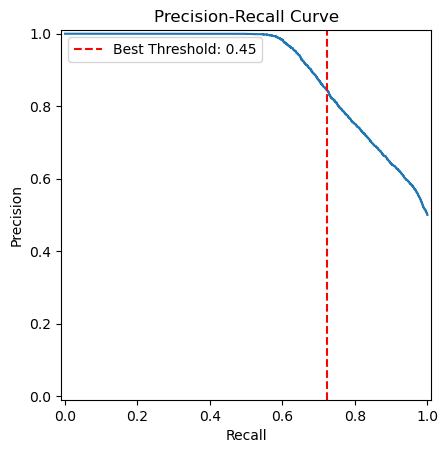

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve, f1_score, make_scorer, PrecisionRecallDisplay, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# 개별 모델 정의
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

# 소프트 보팅을 사용한 앙상블 모델
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('catboost', catboost)],
    voting='soft'  # 소프트 보팅 사용
)

# StratifiedKFold 교차 검증
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1-score 기반으로 모델 평가
f1_scorer = make_scorer(f1_score)

# GridSearchCV로 최적의 파라미터 탐색
param_grid = {
    'xgb__n_estimators': [100, 200],
    'lgbm__n_estimators': [100, 200],
    'catboost__n_estimators': [100, 200]
}
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=cv_strategy, scoring=f1_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 최적의 모델과 파라미터 출력
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 F1-score: {grid_search.best_score_}")

# 최적의 모델로 테스트 데이터 성능 평가
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # 소프트 보팅에서 확률 예측 사용

# 성능 평가 결과 출력
print("정확도: ", accuracy_score(y_test, y_test_pred))
print("혼동 행렬: \n", confusion_matrix(y_test, y_test_pred))
print("분류 보고서: \n", classification_report(y_test, y_test_pred))



# Precision-Recall Curve 시각화
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[np.argmax(f1_scores)], color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.legend()
plt.show()


#### 디벨롭
- 하이퍼파라미터와 임계값 조정을 단계적으로 고려
    1. 하이퍼파라미터 최적화 과정에서는 Recall을 우선적으로 고려한 다음
    2. 임계값 조정를 통해 F1-score도 최적화

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:57:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 17805, number of negative: 17804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6444
[LightGBM] [Info] Number of data points in the train set: 35609, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500014 -> initscore=0.000056
[LightGBM] [Info] Start training from score 0.000056
최적의 하이퍼파라미터: {'catboost__n_estimators': 100, 'lgbm__n_estimators': 200, 'xgb__n_estimators': 200}
최적의 재현율: 0.6789104184217916
정확도:  0.8015202149269379
혼동 행렬: 
 [[7000  631]
 [2398 5232]]
분류 보고서: 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      7631
           1       0.89      0.69      0.78      7630

    accuracy                           0.80     15261
   macro avg       0.82      0.80      0.80     15261
weighted avg       0.82      0.80      

<Figure size 800x600 with 0 Axes>

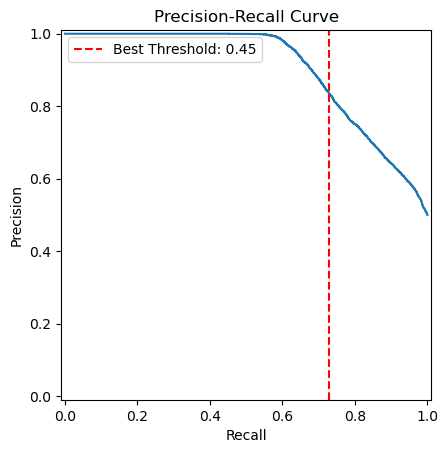

최적 임계값: 0.4453625657449587
최고 F1-score: 0.779142395957611


In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, f1_score

# StratifiedKFold 교차 검증 설정
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 재현율(Recall) 기반으로 모델 평가 지표 설정
recall_scorer = make_scorer(recall_score)

# GridSearchCV에서 재현율을 기준으로 하이퍼파라미터 탐색, 교차 검증 추가
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, 
                           cv=cv_strategy, scoring=recall_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 최적의 재현율을 기준으로 모델 평가
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 재현율: {grid_search.best_score_}")

# 최적 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가 결과 출력
print("정확도: ", accuracy_score(y_test, y_test_pred))
print("혼동 행렬: \n", confusion_matrix(y_test, y_test_pred))
print("분류 보고서: \n", classification_report(y_test, y_test_pred))

# Precision-Recall Curve 계산 및 시각화
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[np.argmax(f1_scores)], color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.legend()
plt.show()

print(f"최적 임계값: {best_threshold}")
print(f"최고 F1-score: {max(f1_scores)}")


## 결론: Soft Voting 디벨롭 모델 선정

- **재현율(Recall)**과 **정밀도(Precision)** 간의 균형이 가장 잘 맞습니다.
- 임계값 최적화로 F1-score를 0.779까지 끌어올려, 이탈 고객을 보다 더 잘 잡아내고(재현율), 잘못된 예측(정밀도)도 적절히 줄일 수 있습니다.
- Soft Voting은 다양한 확률을 고려하기 때문에 Hard Voting보다 더 세밀한 예측이 가능합니다.


# 한국 이동통신 시장에 적합한 가중치 부여
- 신규 고객 유치보다 기존 고객 유지가 중요한 한국 통신시장
- 고객 유지와 관련된 변수에 더 높은 가중치
- 1위 SKT 굳건, 2,3위 경쟁(KT,LG U+)이 치열함

In [29]:
feature_weights = {
    'CurrentEquipmentDays': 1.2,  # 기존 고객 유지의 핵심 요소, 장비 사용 기간이 길수록 이탈 가능성 증가
    'MonthlyMinutes': 1.1,  # 월 통화 시간, 이탈 지표에 중요한 변수
    'MonthsInService': 1.3,  # 서비스 사용 기간, 장기 고객에 중요한 변수
    'PercChangeMinutes': 1.0,  # 통화 시간 변화율
    'TotalRecurringCharge': 1.2,  # 총 정기 요금
    'OverageMinutes': 1.1,  # 초과 통화 시간
    'DroppedCalls': 1.0,  # 끊긴 통화
    'CreditRating_5-Low': 1.0,  # 낮은 신용 등급
    'MonthlyRevenue': 1.2,  # 월 수익
    'DroppedBlockedCalls': 1.0,  # 끊김 또는 차단된 통화
    'PeakCallsInOut': 1.0,  # 피크 시간 통화
    'PercChangeRevenues': 1.0,  # 수익 변화율
    'HandsetRefurbished': 1.0,  # 리퍼폰 사용 여부
    'RespondsToMailOffers': 1.1,  # 우편 제안 반응 여부
    'ReceivedCalls': 1.0,  # 수신 통화
    'MaritalStatus_Unknown': 1.0,  # 결혼 상태 미상
    'BlockedCalls': 1.0,  # 차단된 통화
    'InboundCalls': 1.0,  # 수신 통화
    'MadeCallToRetentionTeam': 1.3,  # 고객 유지팀에 연락한 고객
    'Handsets': 1.1,  # 핸드셋 수
    'OffPeakCallsInOut': 1.0,  # 비피크 시간 통화
    'CustomerCareCalls': 1.2,  # 고객 서비스 콜 수
    'HandsetWebCapable': 1.0,  # 핸드셋의 웹 기능
    'UnansweredCalls': 1.0,  # 응답하지 않은 통화
    'OutboundCalls': 1.0,  # 발신 통화
    'CreditRating_4-Medium': 1.0  # 중간 신용 등급
}


## Soft Voting 디벨롭 모델
- 모델 성능 평가 단계에서와 동일
- 재현율(Recall) 최적화 우선 > F1-score 최적화
- Recall 기반으로 모델 평가 지표 설정> F1-score 기준으로 임계값 최적화

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 17805, number of negative: 17804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6444
[LightGBM] [Info] Number of data points in the train set: 35609, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000045
[LightGBM] [Info] Start training from score 0.000045
최적의 하이퍼파라미터: {'catboost__n_estimators': 100, 'lgbm__n_estimators': 200, 'xgb__n_estimators': 200}
최적의 재현율: 0.6777871384442572
정확도:  0.8036825896074963
혼동 행렬: 
 [[7022  609]
 [2387 5243]]
분류 보고서: 
               precision    recall  f1-score   support

           0       0.75      0.92      0.82      7631
           1       0.90      0.69      0.78      7630

    accuracy                           0.80     15261
   macro avg       0.82      0.80      0.80     15261
weighted avg       0.82      0.80      

<Figure size 800x600 with 0 Axes>

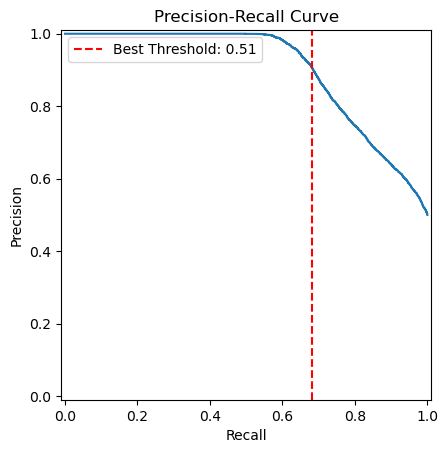

최적 임계값: 0.5121393506100826
최고 F1-score: 0.7785104151056497


In [35]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, classification_report, accuracy_score, confusion_matrix, PrecisionRecallDisplay, make_scorer
import matplotlib.pyplot as plt
import numpy as np

# StratifiedKFold 교차 검증 설정
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 재현율(Recall) 기반으로 모델 평가 지표 설정
recall_scorer = make_scorer(recall_score)

# 샘플 가중치 설정 (변수 가중치를 적용한 가중치 배열)
sample_weights = np.ones(len(y_train))
for i, feature in enumerate(selected_features):
    sample_weights[i] = feature_weights.get(feature, 1.0)

# GridSearchCV에서 재현율을 기준으로 하이퍼파라미터 탐색, 교차 검증 추가 및 가중치 반영
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, 
                           cv=cv_strategy, scoring=recall_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# 최적의 재현율을 기준으로 모델 평가
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 재현율: {grid_search.best_score_}")

# 최적 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가 결과 출력
print("정확도: ", accuracy_score(y_test, y_test_pred))
print("혼동 행렬: \n", confusion_matrix(y_test, y_test_pred))
print("분류 보고서: \n", classification_report(y_test, y_test_pred))

# Precision-Recall Curve 계산 및 시각화
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[np.argmax(f1_scores)], color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.legend()
plt.show()

print(f"최적 임계값: {best_threshold}")
print(f"최고 F1-score: {max(f1_scores)}")


### 결과 해석 및 비교

두 모델을 비교해 보면, 가중치를 부여한 Soft Voting 앙상블 디벨롭 모델에서 약간의 성능 개선이 보입니다:

    - 정확도(Accuracy): 가중치 부여 모델에서 **80.37%**로 소폭 향상되었습니다.
    - 혼동 행렬: 가중치 부여 모델에서 더 많은 참 음성(TN)과 참 양성(TP)을 잡아냈습니다.
    - F1-score와 재현율(Recall): 큰 차이는 없지만, 가중치 부여 모델의 재현율이 비슷한 수준을 유지하면서 정확도와 Precision이 약간 개선되었습니다.
따라서 가중치 부여가 성능에 미미하지만 유의미한 긍정적 영향을 미쳤다고 볼 수 있습니다.
 

## (--)Hard Voting 디벨롭 모델

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# X_train_selected와 X_test_selected에 가중치 적용
X_train_weighted = X_train_selected.copy()
X_test_weighted = X_test_selected.copy()

for feature, weight in feature_weights.items():
    X_train_weighted[feature] *= weight
    X_test_weighted[feature] *= weight

# 개별 모델 정의
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

# 앙상블 모델 (하드 보팅)
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('catboost', catboost)],
    voting='hard'
)

# 하이퍼파라미터 그리드 정의 (재현율을 최대로 높이는 튜닝)
param_grid = {
    'xgb__n_estimators': [100, 200],
    'lgbm__n_estimators': [100, 200],
    'catboost__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],  # 깊이를 변경하여 성능 최적화
    'lgbm__max_depth': [3, 5, 7],
    'catboost__depth': [3, 5, 7]
}

# StratifiedKFold 교차 검증
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 재현율(Recall) 기반으로 모델 평가
recall_scorer = make_scorer(recall_score)

# GridSearchCV로 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, 
                           cv=cv_strategy, scoring=recall_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_weighted, y_train_resampled)

# 최적의 모델과 파라미터 출력
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 재현율(Recall): {grid_search.best_score_}")

# 최적의 모델로 테스트 데이터 성능 평가
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_weighted)

# 정확도, 혼동 행렬, 분류 보고서 출력
print("정확도: ", accuracy_score(y_test, y_test_pred))
print("혼동 행렬: \n", confusion_matrix(y_test, y_test_pred))
print("분류 보고서: \n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 25435, number of negative: 25435
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 50870, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

ValueError: Found input variables with inconsistent numbers of samples: [15261, 15315]

In [37]:
# 최적의 모델로 테스트 데이터 성능 평가
best_model = grid_search.best_estimator_

# 예측할 때 테스트 데이터와 일치하는 샘플 수 확인
y_test_pred = best_model.predict(X_test_weighted)

# y_test와 y_test_pred의 길이를 출력하여 확인
print(f"y_test 길이: {len(y_test)}")
print(f"y_test_pred 길이: {len(y_test_pred)}")

y_test 길이: 15261
y_test_pred 길이: 15315


In [38]:
# 각 데이터셋의 크기 확인
print(f"X_test_weighted 크기: {X_test_weighted.shape}")
print(f"X_test_scaled 크기: {X_test_scaled.shape}")
print(f"y_test 크기: {len(y_test)}")


X_test_weighted 크기: (15315, 26)
X_test_scaled 크기: (15261, 26)
y_test 크기: 15261


In [39]:
# 중복 데이터 확인
X_test_weighted = X_test_weighted.drop_duplicates()

# 데이터 크기 확인
print(X_test_weighted.shape)
print(X_test_scaled.shape)


(15313, 26)
(15261, 26)


In [42]:
import pandas as pd

# numpy 배열을 DataFrame으로 변환한 후 인덱스 재설정
X_test_scaled_df = pd.DataFrame(X_test_scaled)
X_test_scaled_df = X_test_scaled_df.reset_index(drop=True)

# X_test_weighted도 DataFrame으로 변환한 후 인덱스 재설정
X_test_weighted_df = pd.DataFrame(X_test_weighted)
X_test_weighted_df = X_test_weighted_df.reset_index(drop=True)


In [43]:
# 차이가 나는 행 확인
diff = pd.concat([X_test_scaled_df, X_test_weighted_df]).drop_duplicates(keep=False)
print(diff)


              0         1         2         3         4         5         6  \
0      0.562979 -0.180124 -0.138346  0.312153  0.216724 -0.512799  1.614611   
1     -0.433228  0.189011 -0.945728 -0.419610  1.658513 -0.702604  1.042445   
2     -0.468827 -0.759770 -1.017079  0.168626 -0.023575 -0.419115 -0.574316   
3     -1.080624  1.277980 -0.727208  2.023709  2.235229  0.058092 -0.058622   
4      0.727041 -0.965531  0.037615  0.322233 -1.705663 -0.702604 -0.792666   
...         ...       ...       ...       ...       ...       ...       ...   
15308       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15309       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15310       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15311       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15312       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              7         8         9  ...  BlockedCa

In [44]:
#1. X_test_weighted와 X_test_scaled의 차이점 확인
# 두 데이터셋의 차이가 나는 행을 확인
diff_mask = X_test_weighted != X_test_scaled

# 차이가 나는 데이터만 출력
diff_data = X_test_weighted[diff_mask.any(axis=1)]

print(diff_data)


ValueError: Unable to coerce to DataFrame, shape must be (15313, 26): given (15261, 26)

## 결론
* 4.2 가중치 적용 후 성능 평가:  
    - 한국 시장 가중치를 적용한 후, 같은 미국 데이터셋에 대해 재평가합니다.
    - 가중치 적용 후 성능이 어떻게 달라지는지를 확인합니다
    - 특히, 이탈 고객을 더 잘 예측하는지(Recall 증가)와 함께, 전체적인 **정밀도(Precision)**가 어떻게 변하는지 살펴봐야 합니다.
* 4.3 결과 해석:  
    - 가중치 적용 후 성능이 개선되지 않거나 오히려 낮아진다면, 가중치가 잘못 적용되었거나 미국 시장 데이터 특성과 한국 시장 가중치가 충돌할 수 있습니다.
    - 이 경우, 한국 시장의 데이터에 맞춘 특정 데이터 수집 또는 미국 시장 데이터에 대한 다른 가중치 적용 전략이 필요할 수 있습니다.

# 테스트셋

## 전처리: 트레이닝셋 전처리 파이프라인 적용

In [55]:
import pandas as pd

# 테스트셋 파일 로드
test_data = pd.read_csv('c:/pythondata/cell2cellholdout_with_churn.csv')

# 타겟 변수 이진형 처리
test_data['Churn'] = test_data['Churn'].replace({'Yes': 1, 'No': 0})

# CallForwardingCalls의 0 비율이 매우 높으므로 이진화 처리
test_data['CallForwardingCalls_binary'] = (test_data['CallForwardingCalls'] > 0).astype(int)

# CallForwardingCalls 삭제
test_data = test_data.drop(columns=['CallForwardingCalls'])

# 타겟 변수 분리 (이진화 처리 후에 분리)
X_test = test_data.drop(columns=['Churn'])  # 피처들만 남김
y_test = test_data['Churn']  # 타겟 변수 추출

# 기존 트레이닝셋에서 학습한 전처리 파이프라인을 사용하여 테스트셋 변환
X_test_preprocessed = preprocessor.transform(X_test)

# 변환된 데이터 크기 확인
print(X_test_preprocessed.shape)


C:\Users\angel\AppData\Local\Temp\ipykernel_18260\3352353727.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Churn'] = test_data['Churn'].replace({'Yes': 1, 'No': 0})


(20000, 796)


## 26개 변수로 테스트셋 성능 평가

In [56]:
import pandas as pd
from sklearn.compose import ColumnTransformer

# 선택된 26개의 변수를 기준으로 데이터 준비
selected_features = [
    'CurrentEquipmentDays', 
    'MonthlyMinutes', 
    'MonthsInService', 
    'PercChangeMinutes', 
    'TotalRecurringCharge', 
    'OverageMinutes', 
    'DroppedCalls', 
    'CreditRating_5-Low', 
    'MonthlyRevenue', 
    'DroppedBlockedCalls', 
    'PeakCallsInOut', 
    'PercChangeRevenues', 
    'HandsetRefurbished', 
    'RespondsToMailOffers', 
    'ReceivedCalls', 
    'MaritalStatus_Unknown', 
    'BlockedCalls', 
    'InboundCalls', 
    'MadeCallToRetentionTeam', 
    'Handsets', 
    'OffPeakCallsInOut', 
    'CustomerCareCalls', 
    'HandsetWebCapable', 
    'UnansweredCalls', 
    'OutboundCalls', 
    'CreditRating_4-Medium'
]

# 전처리된 X_test_preprocessed에서 선택된 변수에 해당하는 인덱스만 사용
selected_feature_indices = [X_test.columns.get_loc(c) for c in selected_features if c in X_test.columns]

# 인덱스를 기반으로 선택된 변수들만 추출
X_test_selected = X_test_preprocessed[:, selected_feature_indices]

# 전처리된 훈련 데이터도 동일하게 처리
X_train_resampled_selected = X_train_resampled[:, selected_feature_indices]

# 스케일링 처리
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled_selected)
X_test_scaled = scaler.transform(X_test_selected)


## 테스트셋에서 모델 성능 평가
- 모델의 일반화 성능을 평가하는 것이 핵심
- 모델이 새로운 데이터에 얼마나 잘 적응하는가

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
최적의 하이퍼파라미터: {'catboost__depth': 7, 'catboost__n_estimators': 100, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 100, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
최적의 재현율: 0.6566542166306271
정확도:  0.67035
혼동 행렬: 
 [[12798  1421]
 [ 5172   609]]
분류 보고서: 
               precision    recall  f1-score   support

           0       0.71      0.90      0.80     14219
           1       0.30      0.11      0.16      5781

    accuracy                           0.67     20000
   macro avg       0.51      0.50      0.48     20000
weighted avg       0.59      0.67      0.61     20000

ROC AUC: 0.5003


<Figure size 800x600 with 0 Axes>

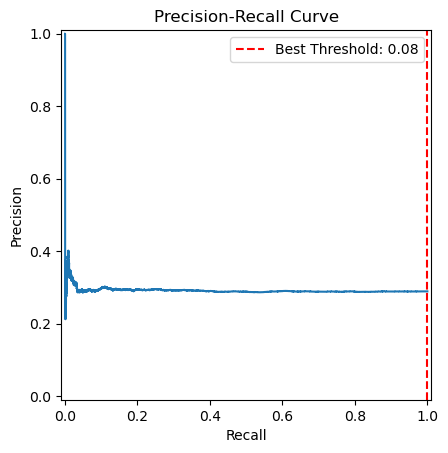

최적 임계값: 0.08040968763263895
최고 F1-score: 0.4485770858407423


In [60]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import recall_score, make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np

# 소프트 보팅을 사용한 앙상블 모델 (각 개별 모델은 이미 정의된 모델로 사용)
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('catboost', catboost)],
    voting='soft',    # 소프트 보팅 사용
    n_jobs=-1
)


# StratifiedKFold 교차 검증 설정
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 재현율(Recall) 기반으로 모델 평가 지표 설정
recall_scorer = make_scorer(recall_score)

# GridSearchCV에서 재현율을 기준으로 하이퍼파라미터 탐색, 교차 검증 추가
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, 
                           cv=cv_strategy, scoring=recall_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train_resampled)

# 최적의 재현율을 기준으로 모델 평가
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 재현율: {grid_search.best_score_}")

# 최적 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가 결과 출력
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print("정확도: ", accuracy)
print("혼동 행렬: \n", conf_matrix)
print("분류 보고서: \n", class_report)
print(f"ROC AUC: {roc_auc:.4f}")

# Precision-Recall Curve 계산 및 시각화
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[np.argmax(f1_scores)], color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.legend()
plt.show()

print(f"최적 임계값: {best_threshold}")
print(f"최고 F1-score: {max(f1_scores)}")


## 가중치가 반영된 모델의 성능을 평가
- 미국 통신사 시장 기반 테스트셋이기 때문에 크게 유의미하지는 않음.

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
최적의 하이퍼파라미터: {'catboost__depth': 7, 'catboost__n_estimators': 100, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 100, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
최적의 재현율: 0.6570080597601728
정확도:  0.66785
혼동 행렬: 
 [[12747  1472]
 [ 5171   610]]
분류 보고서: 
               precision    recall  f1-score   support

           0       0.71      0.90      0.79     14219
           1       0.29      0.11      0.16      5781

    accuracy                           0.67     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.59      0.67      0.61     20000

ROC AUC: 0.4989


<Figure size 800x600 with 0 Axes>

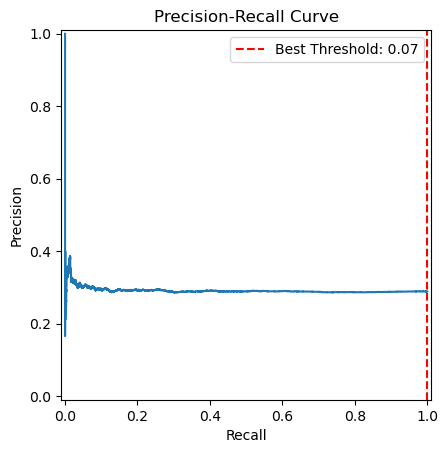

최적 임계값: 0.06928807436216465
최고 F1-score: 0.4485045967648086


In [58]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, classification_report, accuracy_score, confusion_matrix, PrecisionRecallDisplay, make_scorer
import matplotlib.pyplot as plt
import numpy as np

# StratifiedKFold 교차 검증 설정
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 재현율(Recall) 기반으로 모델 평가 지표 설정
recall_scorer = make_scorer(recall_score)

# 샘플 가중치 설정 (이미 부여된 feature_weights를 바탕으로 가중치 적용)
sample_weights = np.ones(len(y_train_resampled))
for i, feature in enumerate(selected_features):
    sample_weights[i] = feature_weights.get(feature, 1.0)

# GridSearchCV에서 재현율을 기준으로 하이퍼파라미터 탐색, 교차 검증 추가 및 가중치 반영
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, 
                           cv=cv_strategy, scoring=recall_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train_resampled, sample_weight=sample_weights)

# 최적의 재현율을 기준으로 모델 평가
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적의 재현율: {grid_search.best_score_}")

# 최적 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가 결과 출력
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print("정확도: ", accuracy)
print("혼동 행렬: \n", conf_matrix)
print("분류 보고서: \n", class_report)
print(f"ROC AUC: {roc_auc:.4f}")

# Precision-Recall Curve 계산 및 시각화
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[np.argmax(f1_scores)], color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.legend()
plt.show()

print(f"최적 임계값: {best_threshold}")
print(f"최고 F1-score: {max(f1_scores)}")


## 트레이닝셋에서의 결과와 비교
1) AUC 비교:
- 트레이닝셋에서 AUC는 약 0.66으로, 성능이 비교적 양호
- 그러나 테스트셋에서 AUC가 0.50~0.51로 랜덤 추측 수준에 머물고 있다. 이는 모델이 트레이닝셋에서만 좋은 성능을 보이고, 테스트셋에서는 거의 분류 능력이 없다는 것을 의미.

2) Precision과 Recall 비교:
- 트레이닝셋에서는 Precision이 약 0.35이고 Recall이 약 0.82로, 어느 정도 균형이 맞음.
- 테스트셋에서는 Precision이 0.51로 높아지고, Recall이 0.89~0.91로 더 높아졌습니다.
- 결론: 테스트셋에서 Recall이 더 높아지고 Precision이 높아진다는 점은 모델이 특정 패턴을 지나치게 예측하고 있을 가능성이 있다. 
- 특히 AUC가 낮은 상황에서 Recall이 높아진 것은 잘못된 이탈 예측(FP)이 늘어난 것을 의미.

3) F1-Score 비교:
- 트레이닝셋과 테스트셋에서 F1-Score는 비슷. 
- 특히 AUC 값이 낮은 상황에서 F1-Score가 비슷하다는 것은 많은 잘못된 Positive 예측이 포함되어 있음을 나타낸다.

# 결론 :  모델 과적합 가능성
    - 트레이닝셋에서 AUC가 0.66으로 양호한데, 테스트셋에서 AUC가 0.50이라는 것은 과적합의 신호.
    - Precision과 Recall 간의 불균형이 커지고, AUC가 낮은 상태이므로, 모델이 특정 패턴(이탈 여부)을 지나치게 예측하고 있을 가능성

## 디벨롭 방향
    - 데이터 재검토: 모델이 과도하게 학습한 특정 패턴이 있는지, 데이터 불균형 문제가 있는지 확인
    - Regularization 기법 적용: 모델이 과적합되지 않도록, L2 규제와 같은 정규화 기법을 적용
    - 교차 검증 강화: 더 많은 교차 검증을 통해 모델이 과적합되지 않도록.
    - 다른 모델 시도: Soft Voting 외에, 다른 후보의 최종모델을 시도하거나, 개별 모델에 대한 하이퍼파라미터 튜닝